In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
file = 'SOL_tweets.csv'
file = 'USDT_tweets.csv'
file= 'BTC_tweets.csv'
data = pd.read_csv(file)
data

Unnamed: 0             Tweet_ID  \
0                0  1584267915502977024   
1                1  1584267914953502720   
2                2  1584267912818270209   
3                3  1584267907940294656   
4                4  1584267900726435840   
...            ...                  ...   
499996      499996  1579822885060894720   
499997      499997  1579822882879782915   
499998      499998  1579822878450601987   
499999      499999  1579822864479715329   
500000      500000  1579822829918654465   

                                                      URL     Account_Name  \
0       https://twitter.com/VeronicaLake21/status/1584...   VeronicaLake21   
1       https://twitter.com/EverleyHarriso1/status/158...  EverleyHarriso1   
2       https://twitter.com/TIPMayerMultple/status/158...  TIPMayerMultple   
3       https://twitter.com/cryptotrendin/status/15842...    cryptotrendin   
4       https://twitter.com/0xEthereumYoda/status/1584...   0xEthereumYoda   
...                                                   ...              ...   
499996  https://twitter.com/SirDuCutj/status/157982288...        SirDuCutj   
499997  https://twitter.com/whalesradar_com/status/157...  whalesradar_com   
499998  https://twitter.com/CyptoNewsUpdate/status/157...  CyptoNewsUpdate   
499999  https://twitter.com/OCDecaf/status/15798228644...          OCDecaf   
500000  https://twitter.com/CrezyRexFlock/status/15798...    CrezyRexFlock   

                                                     Text  \
0       @BTC_for_Freedom Is this the best that you can...   
1       CNN desconecta Web3, NFT Project Vault - https...   
2       Oct 23, 2022: The current Mayer Multiple is 0....   
3       Top 5 Mentions Updated Every 15 Minutes\n\n  [...   
4       #Ethereum price update: \n\n#ETH $1331.39 USD\...   
...                                                   ...   
499996  #crypto #bitcoin #altcoin #NFTs #btc #eth #xrp...   
499997  #XVGUSDT #XVG \nSignal #4  \n\nLast Signal: 14...   
499998  Google selects Coinbase to take cloud payments...   
499999  1. $BTC #LTF looks even fucking worse, good Go...   
500000  🏮FIRST HOLDER BENEFITS\nShout out to: lucifa.b...   

                         Datetime   Source  Number_Retweets  Number_Likes  \
0       2022-10-23 19:37:59+00:00  Twitter                0             0   
1       2022-10-23 19:37:59+00:00  Twitter                0             0   
2       2022-10-23 19:37:59+00:00  Twitter                0             0   
3       2022-10-23 19:37:58+00:00  Twitter                0             0   
4       2022-10-23 19:37:56+00:00  Twitter                0             0   
...                           ...      ...              ...           ...   
499996  2022-10-11 13:15:02+00:00  Twitter                0             2   
499997  2022-10-11 13:15:01+00:00  Twitter                0             0   
499998  2022-10-11 13:15:00+00:00  Twitter                0             2   
499999  2022-10-11 13:14:57+00:00  Twitter                0             0   
500000  2022-10-11 13:14:48+00:00  Twitter                1             7   

        Number_Comments  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
499996                4  
499997                1  
499998                0  
499999                0  
500000                0  

[500001 rows x 10 columns]

In [3]:
G_retweet = nx.DiGraph()
G_mention = nx.DiGraph()

In [5]:
data.columns

Index(['Unnamed: 0', 'Tweet_ID', 'URL', 'Account_Name', 'Text', 'Datetime',
       'Source', 'Number_Retweets', 'Number_Likes', 'Number_Comments'],
      dtype='object')

In [7]:
# loop through each row
for r in data.iterrows():
#     pp(r)
    author = r[1]['Account_Name']
    author = f'@{author}'
  
    text = r[1]['Text']

#     try:
    timestamp = pd.to_datetime(r[1]['Datetime'])
#     except:
#         continue
 
    # use regular expressions to extract retweets and mentions
    retweets = set(re.findall(r"RT @(\w+)", text))
    mentions = set(re.findall(r"@(\w+)", text))


    # remove duplicated users
    for r in retweets:
        if r in mentions:
            mentions.remove(r)

    # add the users if there are any mentioned in the text.
    has_users = len(retweets) + len(mentions) > 0
    if has_users:
        for u in retweets:
            u = f'@{u}'
            G_retweet.add_edge(author, u, Timestamp=timestamp)


        for u in mentions:
            u = f'@{u}'
            G_mention.add_edge(author, u, Timestamp=timestamp)

In [8]:
df_retweet = nx.to_pandas_edgelist(G_retweet)
df_retweet

source            target                 Timestamp
0       @bitethfinder    @TATrader_Alan 2022-10-22 09:45:56+00:00
1       @bitethfinder      @i_am_jackis 2022-10-23 09:45:18+00:00
2       @bitethfinder       @Crypto_Dep 2022-10-22 08:45:47+00:00
3       @bitethfinder         @rovercrc 2022-10-22 07:45:35+00:00
4       @bitethfinder   @Btcexpertindia 2022-10-22 07:45:33+00:00
..                ...               ...                       ...
189  @anonycryptobull      @pete_rizzo_ 2022-10-12 10:44:14+00:00
190      @kriptoklovn   @MagicCraftGame 2022-10-12 09:58:54+00:00
191  @actuallyadamk92         @depp_nft 2022-10-11 17:24:01+00:00
192    @TmwAutoTrader  @crypto_harmonic 2022-10-11 15:54:45+00:00
193    @Coreum2024444    @realSologenic 2022-10-11 15:32:42+00:00

[194 rows x 3 columns]

In [9]:
df_mention = nx.to_pandas_edgelist(G_mention)
df_mention

source            target                 Timestamp
0        @VeronicaLake21  @BTC_for_Freedom 2022-10-23 02:35:06+00:00
1        @VeronicaLake21          @ZERP589 2022-10-23 02:35:06+00:00
2        @VeronicaLake21     @XRPrincesses 2022-10-23 02:35:06+00:00
3       @BTC_for_Freedom      @Croesus_BTC 2022-10-12 16:57:31+00:00
4       @TIPMayerMultple  @TIPMayerMultple 2022-10-11 15:01:00+00:00
...                  ...               ...                       ...
208069    @Cryptotigers8     @CryptoWendyO 2022-10-11 13:15:48+00:00
208070         @tzongocu          @binance 2022-10-11 13:15:35+00:00
208071     @FonsiKristen    @CharityToken4 2022-10-11 13:15:27+00:00
208072     @xrp_mxracing         @BCBacker 2022-10-11 13:15:16+00:00
208073    @MillionIwanta       @cryptojack 2022-10-11 13:15:06+00:00

[208074 rows x 3 columns]

In [19]:
df_mention.to_csv('BTC_tweets_graph.csv')
print( nx.info(G_mention))

Name: 
Type: DiGraph
Number of nodes: 104573
Number of edges: 208074
Average in degree:   1.9897
Average out degree:   1.9897


In [12]:
## find the top account by pagerank
page_rank = nx.pagerank(G_mention)
sorted_account = dict(sorted([(node, pagerank) for node, pagerank in page_rank.items()], key=lambda x:page_rank[x[0]], reverse=True))
sorted_account

{'@BTC_Archive': 0.014991869054897407,
 '@elonmusk': 0.007077413096272773,
 '@deezy_BTC': 0.006038315053138028,
 '@Croesus_BTC': 0.005124830596988602,
 '@BTC_for_Freedom': 0.004241860415092607,
 '@rovercrc': 0.003989579804810839,
 '@btc_charlie': 0.0039008069049582287,
 '@saylor': 0.003567192135849557,
 '@MicroStrategy': 0.003423355542452217,
 '@ptc_sitapur': 0.002612067480569542,
 '@binance': 0.002528573037857531,
 '@Trainwreckstv': 0.0023248422765416357,
 '@TheMoonCarl': 0.0020886789808113437,
 '@boltcoiner': 0.0020872444728070286,
 '@_bitcoiner': 0.0020443768928585858,
 '@AltCryptoGems': 0.001915130113664939,
 '@BTC_JackSparrow': 0.0018237440788926292,
 '@BitcoinMagazine': 0.0017617677359542862,
 '@Bitboy_Crypto': 0.001732299909559466,
 '@BentoBoiNFT': 0.0016899017284079767,
 '@LarryMiles': 0.0016745144060011184,
 '@cryptojack': 0.0016408713713259445,
 '@JoshALivingston': 0.001619904534267028,
 '@MartiniGuyYT': 0.0015912053582891178,
 '@MMCrypto': 0.0015697008251053294,
 '@OfficialT

In [52]:
# df_mention.to_csv('BTC_tweets_pagerank.csv')
pagerank_df = pd.DataFrame(sorted_account.items())
pagerank_df.to_csv('BTC_tweets_account_pagerank.csv')

In [42]:
# find top 20 account and put in a list 
top_account = list(sorted_account.keys())[:20]
top_account

['@BTC_Archive',
 '@elonmusk',
 '@deezy_BTC',
 '@Croesus_BTC',
 '@BTC_for_Freedom',
 '@rovercrc',
 '@btc_charlie',
 '@saylor',
 '@MicroStrategy',
 '@ptc_sitapur',
 '@binance',
 '@Trainwreckstv',
 '@TheMoonCarl',
 '@boltcoiner',
 '@_bitcoiner',
 '@AltCryptoGems',
 '@BTC_JackSparrow',
 '@BitcoinMagazine',
 '@Bitboy_Crypto',
 '@BentoBoiNFT']

# Second part: visualization 

In [18]:
data1 = data.iloc[:3000,:]
data1

Unnamed: 0             Tweet_ID  \
0              0  1584267915502977024   
1              1  1584267914953502720   
2              2  1584267912818270209   
3              3  1584267907940294656   
4              4  1584267900726435840   
...          ...                  ...   
2995        2995  1584243348965322752   
2996        2996  1584243346872373248   
2997        2997  1584243346075095041   
2998        2998  1584243345601179648   
2999        2999  1584243344183820290   

                                                    URL     Account_Name  \
0     https://twitter.com/VeronicaLake21/status/1584...   VeronicaLake21   
1     https://twitter.com/EverleyHarriso1/status/158...  EverleyHarriso1   
2     https://twitter.com/TIPMayerMultple/status/158...  TIPMayerMultple   
3     https://twitter.com/cryptotrendin/status/15842...    cryptotrendin   
4     https://twitter.com/0xEthereumYoda/status/1584...   0xEthereumYoda   
...                                                 ...              ...   
2995  https://twitter.com/CrypnalApp/status/15842433...       CrypnalApp   
2996  https://twitter.com/agency_crypto/status/15842...    agency_crypto   
2997  https://twitter.com/Thespuzz/status/1584243346...         Thespuzz   
2998  https://twitter.com/altscanner/status/15842433...       altscanner   
2999  https://twitter.com/BtcNitrobetting/status/158...  BtcNitrobetting   

                                                   Text  \
0     @BTC_for_Freedom Is this the best that you can...   
1     CNN desconecta Web3, NFT Project Vault - https...   
2     Oct 23, 2022: The current Mayer Multiple is 0....   
3     Top 5 Mentions Updated Every 15 Minutes\n\n  [...   
4     #Ethereum price update: \n\n#ETH $1331.39 USD\...   
...                                                 ...   
2995  🟢🚨 #BTC  $148,835 SHORT Liqudation | $BTC Pric...   
2996  CZ first came across Bitcoin in 2013 and was a...   
2997  Small Bitcoin investors stop whales from crash...   
2998  🔼⏰ $ATOM Is Warming Up From 11.689            ...   
2999  9 #BTC($175K) in total prizes is up for grabs ...   

                       Datetime   Source  Number_Retweets  Number_Likes  \
0     2022-10-23 19:37:59+00:00  Twitter                0             0   
1     2022-10-23 19:37:59+00:00  Twitter                0             0   
2     2022-10-23 19:37:59+00:00  Twitter                0             0   
3     2022-10-23 19:37:58+00:00  Twitter                0             0   
4     2022-10-23 19:37:56+00:00  Twitter                0             0   
...                         ...      ...              ...           ...   
2995  2022-10-23 18:00:22+00:00  Twitter                0             0   
2996  2022-10-23 18:00:22+00:00  Twitter                0             0   
2997  2022-10-23 18:00:22+00:00  Twitter                0             0   
2998  2022-10-23 18:00:22+00:00  Twitter                0             0   
2999  2022-10-23 18:00:21+00:00  Twitter                0             0   

      Number_Comments  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
2995                0  
2996                0  
2997                0  
2998                0  
2999                0  

[3000 rows x 10 columns]

In [21]:
def build_graph(data):
    G_retweet = nx.DiGraph()
    G_mention = nx.DiGraph()
# loop through each row
    for r in data.iterrows():
    #     pp(r)
        author = r[1]['Account_Name']
        author = f'@{author}'

        text = r[1]['Text']

    #     try:
        timestamp = pd.to_datetime(r[1]['Datetime'])
    #     except:
    #         continue

        # use regular expressions to extract retweets and mentions
        retweets = set(re.findall(r"RT @(\w+)", text))
        mentions = set(re.findall(r"@(\w+)", text))


        # remove duplicated users
        for r in retweets:
            if r in mentions:
                mentions.remove(r)

        # add the users if there are any mentioned in the text.
        has_users = len(retweets) + len(mentions) > 0
        if has_users:
            for u in retweets:
                u = f'@{u}'
                G_retweet.add_edge(author, u, Timestamp=timestamp)


            for u in mentions:
                u = f'@{u}'
                G_mention.add_edge(author, u, Timestamp=timestamp)
    return G_retweet,G_mention

In [23]:
G_retweet_1,G_mention_3000 = build_graph(data1)
df_mention_3000 = nx.to_pandas_edgelist(G_mention_3000)
df_mention_3000

source            target                 Timestamp
0      @VeronicaLake21  @BTC_for_Freedom 2022-10-23 19:37:59+00:00
1     @TIPMayerMultple  @TIPMayerMultple 2022-10-23 19:37:59+00:00
2            @level941      @holeyprofit 2022-10-23 19:37:52+00:00
3            @level941  @HPCrashforecast 2022-10-23 19:37:52+00:00
4     @Schosch45005215         @rovercrc 2022-10-23 19:37:34+00:00
...                ...               ...                       ...
1689  @KensingtonBooks      @Leannarenee 2022-10-23 18:00:36+00:00
1690  @KensingtonBooks     @_AndreaJanes 2022-10-23 18:00:36+00:00
1691         @riaasti9       @_bitcoiner 2022-10-23 18:00:36+00:00
1692         @riaasti9       @boltcoiner 2022-10-23 18:00:36+00:00
1693   @arkadiodevolaj          @eliz883 2022-10-23 18:00:24+00:00

[1694 rows x 3 columns]

In [49]:
# setting for node size and colors 
g= G_mention_3000
bt_colors = [2 if node in top_account else 0 for node in list(g.nodes())]
bt_values = [ 50 if node in top_account else 5 for node in list(g.nodes())]
bt_values

[5,
 50,
 5,
 5,
 5,
 5,
 5,
 50,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 50,
 5,
 5,
 5,
 5,
 5,
 50,
 50,
 5,
 5,
 5,
 50,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 50,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 50,
 5,
 5,
 5,
 50,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,

In [44]:
# setting for lables 
labels = {}    
hubs = top_account
for node in g.nodes():
    if node in hubs:
        #set the node name as the key and the label as its value 
        labels[node] = node
#set the argument 'with labels' to False so you have unlabeled graph
labels
spring_pos = nx.spring_layout(g)
pos_attrs = {}
for node, coords in spring_pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.08)
pos_attrs   

{'@VeronicaLake21': (0.7774717211723328, 0.14998734176158907),
 '@BTC_for_Freedom': (0.9295948147773743, 0.16203702419996263),
 '@TIPMayerMultple': (0.320818692445755, 0.948209421634674),
 '@level941': (-0.5896105766296387, 0.7326690125465393),
 '@holeyprofit': (-0.6639977097511292, 0.774781482219696),
 '@HPCrashforecast': (-0.6171827912330627, 0.8079287576675415),
 '@Schosch45005215': (-0.1492297500371933, 0.10044774405658245),
 '@rovercrc': (-0.3528735935688019, 1.0089095401763917),
 '@Abhijit69064730': (-0.6301338076591492, 0.20454479187726976),
 '@murinda_jackson': (-0.9727374911308289, -0.0689330530166626),
 '@marcvidal': (-0.43311354517936707, 1.0027773547172547),
 '@Xcalibur1972': (-0.17950765788555145, -0.7485239934921265),
 '@MariusCrypt0': (-0.19017241895198822, -0.8013027739524842),
 '@KurisuMakise004': (0.6742562055587769, -0.3840461802482605),
 '@ThisIsNuse': (0.8517303466796875, -0.49882499694824217),
 '@feelingcuntynow': (-0.7055830955505371, 0.32541816115379335),
 '@BTC

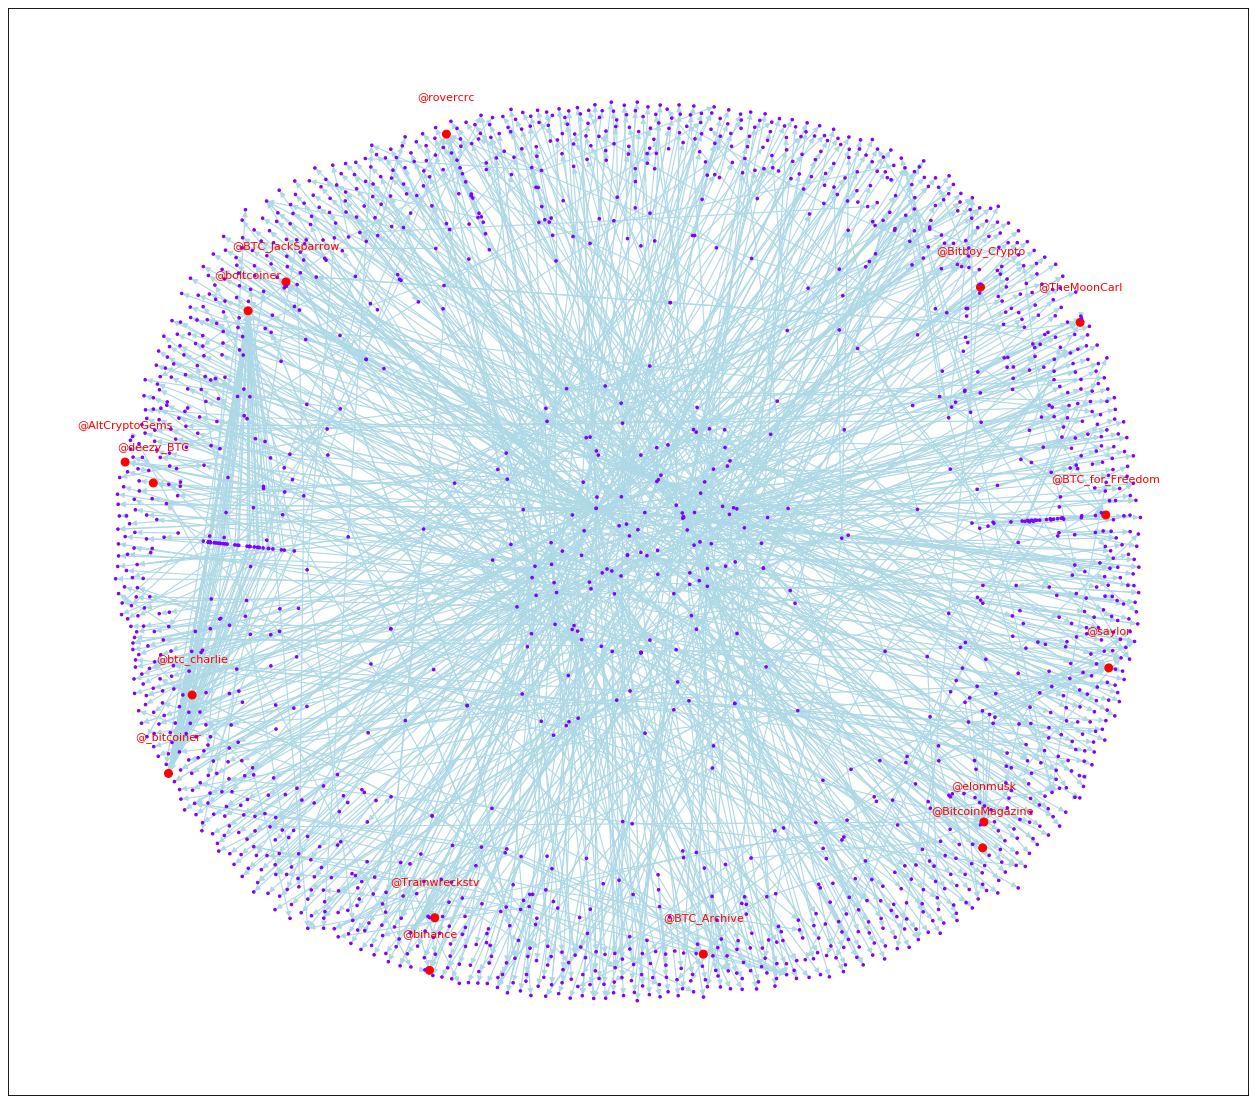

In [50]:
plt.figure(figsize=(20, 18),dpi=80)
nx.draw_networkx(g, pos=spring_pos, cmap=plt.get_cmap("rainbow"), node_color=bt_colors, node_size=bt_values, edge_color='lightblue', width=1,
                 with_labels=False)
nx.draw_networkx_labels(g,pos_attrs,labels,font_size=10,font_color='r')
plt.show()

# Third part: betweenness_centrality

In [27]:
betweenness_centrality= nx.betweenness_centrality_source(g)
betweenness_centrality

{'@VeronicaLake21': 0.0,
 '@BTC_for_Freedom': 0.0,
 '@TIPMayerMultple': 0.0,
 '@level941': 0.0,
 '@holeyprofit': 0.0,
 '@HPCrashforecast': 0.0,
 '@Schosch45005215': 0.0,
 '@rovercrc': 0.0,
 '@Abhijit69064730': 0.0,
 '@murinda_jackson': 0.0,
 '@marcvidal': 0.0,
 '@Xcalibur1972': 0.0,
 '@MariusCrypt0': 0.0,
 '@KurisuMakise004': 0.0,
 '@ThisIsNuse': 0.0,
 '@feelingcuntynow': 0.0,
 '@BTC_Gal': 0.0,
 '@haltercroptop': 0.0,
 '@TJ_NGMI': 0.0,
 '@0xthade': 0.0,
 '@matthew52657810': 0.0,
 '@DTAPCAP': 0.0,
 '@villygamestv': 0.0,
 '@crypto': 0.0,
 '@Patimoon78': 0.0,
 '@RusherLady': 0.0,
 '@cryptoleroo': 0.0,
 '@CryptoEmre2020': 0.0,
 '@Bitcoinhabebe': 0.0,
 '@gem_hunter69': 0.0,
 '@cryptodogcalls': 0.0,
 '@CryptoNinja4444': 0.0,
 '@MrKazaki': 0.0,
 '@OfficialTravlad': 0.0,
 '@AltCryptoGems': 0.0,
 '@fidnado': 0.0,
 '@CelsiusEarn': 0.0,
 '@mycotoxin11': 0.0,
 '@TradingView': 0.0,
 '@LN_assets': 0.0,
 '@_bitcoiner': 0.0,
 '@boltcoiner': 0.0,
 '@Deren0013': 0.0,
 '@stablekwon': 0.0,
 '@IAntsipau': 

In [29]:
bt = betweenness_centrality
temp_colors = [bt[node] for node in list(g.nodes())]
bt_colors = [ 2 if i!=0 else i for i in temp_colors ]
bt_values = [ 5 if bt[node]==0 else 150 for node in list(g.nodes())]
bt_colors

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2,
 0.0,
 2,
 2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

{'@BrexBits': '@BrexBits',
 '@pierre_crypt0': '@pierre_crypt0',
 '@Crypto_Sauce9': '@Crypto_Sauce9',
 '@Zach_HODL_ON': '@Zach_HODL_ON',
 '@ChazzonKe': '@ChazzonKe',
 '@WhereBTC': '@WhereBTC',
 '@Stromens': '@Stromens',
 '@CryptoCred': '@CryptoCred',
 '@Melondydez': '@Melondydez',
 '@mattomattik': '@mattomattik',
 '@MisterSpread': '@MisterSpread',
 '@CanteringClark': '@CanteringClark'}

In [37]:
# lable settings 
labels = {}    
hubs = [k for k,v in bt.items() if v !=0 ]
for node in g.nodes():
    if node in hubs:
        #set the node name as the key and the label as its value 
        labels[node] = node
#set the argument 'with labels' to False so you have unlabeled graph
labels
spring_pos = nx.spring_layout(g)
pos_attrs = {}
for node, coords in spring_pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.08)
pos_attrs    

{'@VeronicaLake21': (-0.6643410986337708, -0.3761151082729324),
 '@BTC_for_Freedom': (-0.7775281175175501, -0.4601636132003272),
 '@TIPMayerMultple': (0.3011582380629797, 1.0084121854641097),
 '@level941': (-0.16754522069163502, 0.7937885489255759),
 '@holeyprofit': (-0.4791531616221248, 0.9533355376502253),
 '@HPCrashforecast': (0.0848481631299435, 1.0111626384410215),
 '@Schosch45005215': (0.61451488557836, 0.42975890239178743),
 '@rovercrc': (0.8464964918522937, 0.06723163180057923),
 '@Abhijit69064730': (-0.27734942757584985, 0.04867343450051406),
 '@murinda_jackson': (-0.8379569615962729, -0.40289615556684477),
 '@marcvidal': (-0.851655153288763, -0.2030247841306404),
 '@Xcalibur1972': (-0.8497875989842102, 0.15387599143801514),
 '@MariusCrypt0': (-0.8665015829820069, 0.1545752621004911),
 '@KurisuMakise004': (0.5356398979972499, -0.46268078092506343),
 '@ThisIsNuse': (0.6229562899446033, -0.551191485017339),
 '@feelingcuntynow': (0.5187278036647875, 0.567637638200971),
 '@BTC_Gal

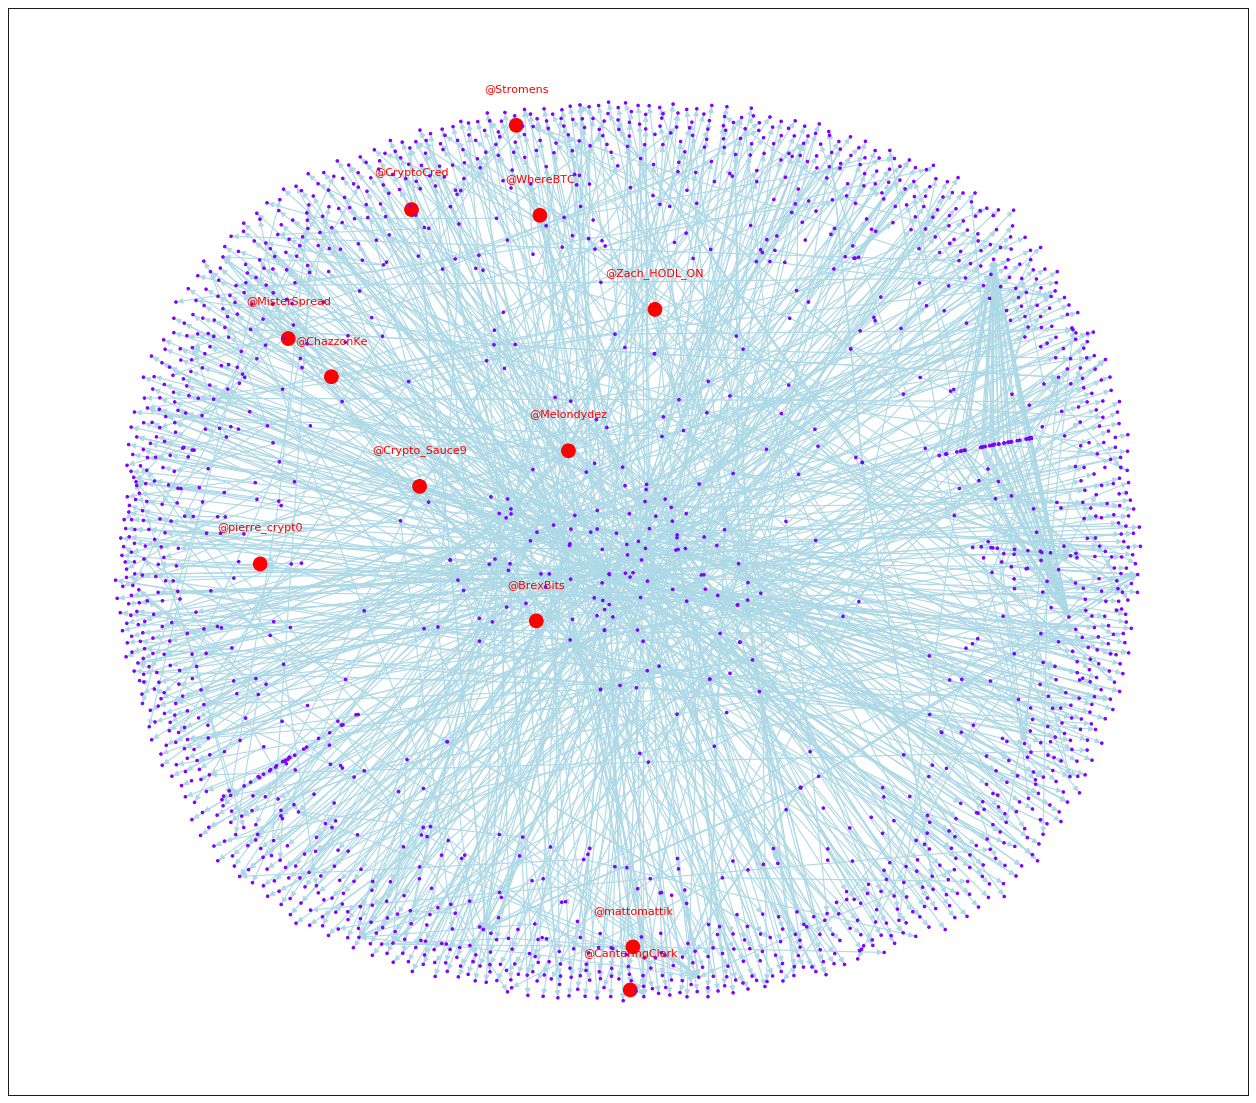

In [38]:
plt.figure(figsize=(20, 18),dpi=80)
nx.draw_networkx(g, pos=spring_pos, cmap=plt.get_cmap("rainbow"), node_color=bt_colors, node_size=bt_values, edge_color='lightblue', width=1,
                 with_labels=False)
nx.draw_networkx_labels(g,pos_attrs,labels,font_size=10,font_color='r')
plt.show()

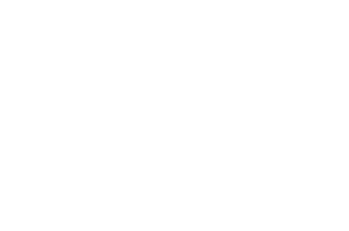

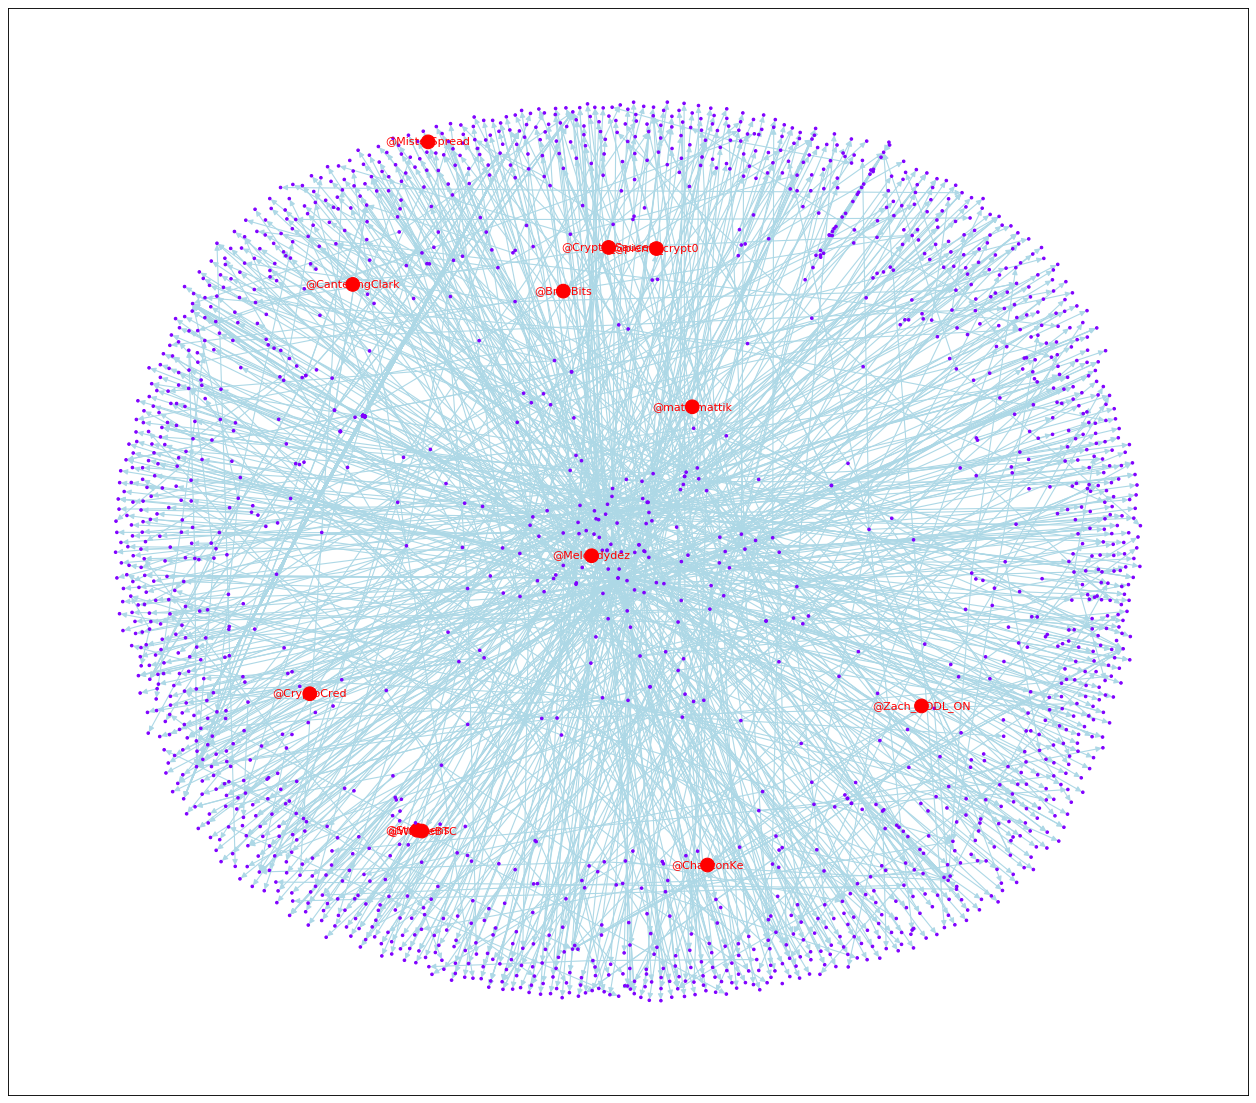

In [36]:
# nx.draw(G, with_labels=False)
# looks like everytime draw a little bit different 
plt.axis("off")
# fig = plt.figure(1, figsize=(200, 180))
plt.figure(figsize=(20, 18),dpi=80)

spring_pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=spring_pos, cmap=plt.get_cmap("rainbow"), node_color=bt_colors, node_size=bt_values, edge_color='lightblue', width=1,
                 with_labels=False)
nx.draw_networkx_labels(g,spring_pos,labels,font_size=10,font_color='r')
plt.show()
